In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 한글설정
!apt-get install -y fonts-nanum # 나눔 폰트 다운
# !ls -l /usr/share/fonts/truetype/ # 설치 확인
!rm -rf ~/.cache/matplotlib/* # 남아있는 폰트 캐시 제거
!fc-cache -fv # 폰트 캐시 생성

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 6 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/X11R6/lib/X11/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig

In [5]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [6]:
# Data Read
data = pd.read_csv("../data/장애인복지시설현황.csv")

In [7]:
data.head()

,년도,거주시설,직업재활시설,지역사회재활시설,생산품판매시설,의료재활시설
0,2016,1505,582,1303,17,20
1,2017,1517,625,1333,17,19
2,2018,1527,651,1373,17,19
3,2019,1557,683,1486,17,18


In [8]:
# 년도 컬럼 지우기
data_drop = data.copy()
data_sum = data_drop.drop('년도', axis=1)

In [9]:
data_sum.head()

,거주시설,직업재활시설,지역사회재활시설,생산품판매시설,의료재활시설
0,1505,582,1303,17,20
1,1517,625,1333,17,19
2,1527,651,1373,17,19
3,1557,683,1486,17,18


In [10]:
# 년도별 토탈값
total_2015 = 3327

total_2016 = data_sum.iloc[0].sum()
total_2017 = data_sum.iloc[1].sum()
total_2018 = data_sum.iloc[2].sum()
total_2019 = data_sum.iloc[3].sum()

print(f"토탈 값\n2015 : {total_2015}\n2016 : {total_2016}\n2017 : {total_2017}\n2018 : {total_2018}\n2019 : {total_2019}")

토탈 값
2015 : 3327
2016 : 3427
2017 : 3511
2018 : 3587
2019 : 3761


In [11]:
# 전년도 대비 증가율

up_2019 = ((total_2019 - total_2018) / total_2018) * 100
up_2018 = ((total_2018 - total_2017) / total_2017) * 100
up_2017 = ((total_2017 - total_2016) / total_2016) * 100
up_2016 = ((total_2016 - total_2015) / total_2015) * 100

print(f"증가률\n2016 : {up_2016}\n2017 : {up_2017}\n2018 : {up_2018}\n2019 : {up_2019}")

증가률
2016 : 3.005710850616171
2017 : 2.451123431572804
2018 : 2.1646254628311024
2019 : 4.850850292723725


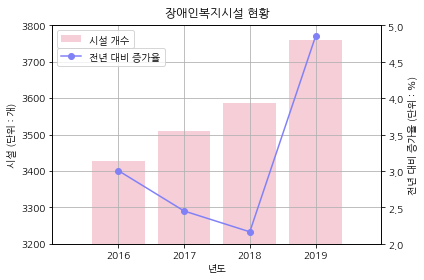

In [90]:
# 시각화 (년도별 토탈값 : 막대그래프 / 전년도 대비 증가율 : 꺾은선 그래프)

# x축
x = (2016, 2017, 2018, 2019)
# 년도별 개수
bar_y = (total_2016, total_2017, total_2018, total_2019)
# 전년도 대비 증가율
plot_y = (up_2016, up_2017, up_2018, up_2019)

# 1번
fig, ax1 = plt.subplots()
# 눈금 간격
ax1.axis([2015, 2020, 3200, 3800])
# 라벨
ax1.set_xlabel("년도")
ax1.set_ylabel("시설 (단위 : 개)")
# 눈금
ax1.grid(True)
# 그래프 생성
ax1.bar(x, bar_y, color='#F6CED8', label='시설 개수')

# 2번
ax2 = ax1.twinx()
# 라벨
ax2.set_ylabel("전년 대비 증가율 (단위 : %)")
# 눈금 간격
ax2.axis([2015, 2020, 2, 5])
# 그래프 생성
ax2.plot(x, plot_y, color='#8181F7', marker='o', label='전년 대비 증가율')

# X축 간격
plt.xticks([2016, 2017, 2018, 2019])
# 제목
plt.title("장애인복지시설 현황", loc='center', pad=10)
# 범례
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.92))

plt.tight_layout()
# plt.show()
plt.savefig('장애인복지시설현황 시각화.png', dpi=200, facecolor='#FFFFFF')